In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from train_predict_gender import Trainer

In [4]:
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load Data

In [5]:
from adversarial_debiasing.dataset import AdultDataset 
data_path = "../datasets/adult/"
dataset = AdultDataset(data_path)
train_set, val_set, dict_labels, weights = dataset.load_data()

In [6]:
X_train = train_set[0]
Y_train = train_set[2]

X_val = val_set[0]
Y_val = val_set[2]

# Train a classifier to predict gender from representations 

In [7]:
trainer = Trainer(input_size=X_train.shape[1], hidden_size=128, lr=0.01, epochs=50)

In [8]:
trainer.evaluation(X_val, Y_val)

Loss: 7.407356262207031
Accuracy:  tensor([0.3279])


In [9]:
trainer.train(X_train, Y_train)

epoch 0	loss : 7.35713529586792	
epoch 5	loss : 2.9554331302642822	
epoch 10	loss : 1.6525956392288208	
epoch 15	loss : 1.26706862449646	
epoch 20	loss : 0.8391408324241638	
epoch 25	loss : 0.6643943190574646	
epoch 30	loss : 0.53739994764328	
epoch 35	loss : 0.5242173671722412	
epoch 40	loss : 0.5266972780227661	
epoch 45	loss : 0.5133768320083618	


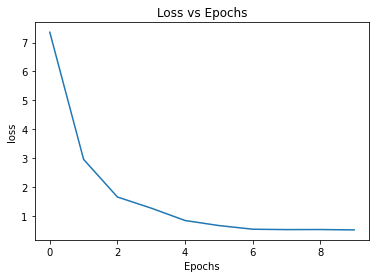

In [10]:
trainer.plot_loss()

In [11]:
trainer.evaluation(X_train, Y_train)

Loss: 0.5033838748931885
Accuracy:  tensor([0.7443])


In [12]:
trainer.evaluation(X_val, Y_val)

Loss: 0.4983285963535309
Accuracy:  tensor([0.7494])


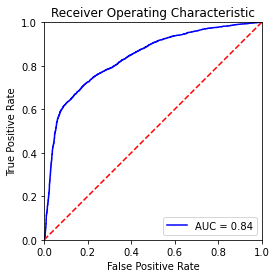

In [13]:
trainer.plot_ROC(X_val, Y_val)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000).fit(X_train_scaled, Y_train.T[0])
print(clf.score(X_val_scaled, Y_val))